In [ ]:
#start implementing
import numpy as np 
import pandas as pd 

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [ ]:
!pip install mysql-connector-python


     |████████████████████████████████| 30.9 MB 78 kB/s 


In [ ]:
import mysql.connector
import csv

In [ ]:
#connecting to the databse
mydb = mysql.connector.connect(
  host="143.110.252.128",
  user="nac",
  password="sem6Project",
  database="scrapped_data"
)


#inseting to the database
cursor = mydb.cursor()
#cursor = conn.cursor()
cursor.execute("select * from btc_cleaned_data;")
with open("btc_rev.csv", "w", newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow([i[0] for i in cursor.description]) # write headers
    csv_writer.writerows(cursor)
cursor.close()

True

In [ ]:
#loading data
#from google.colab import files
#files.upload()

In [ ]:
#get and show the data
df = pd.read_csv("btc_rev.csv")
print(df)

     data_id        date  ... diluted_market_cap  circulating_supply
0          1  18/07/2021  ...       664198685987          18759687.0
1          2  18/07/2021  ...       664198685987          18759687.0
2          3  18/07/2021  ...       664536806775          18759687.0
3          4  18/07/2021  ...       666514404046          18759687.0
4          5  18/07/2021  ...       666858240786          18759768.0
..       ...         ...  ...                ...                 ...
497      498  07/08/2021  ...       917671956917          18778768.0
498      499  07/08/2021  ...       917081717830          18778837.0
499      500  07/08/2021  ...       920201998275          18778837.0
500      501  07/08/2021  ...       912554620233          18778918.0
501      502  07/08/2021  ...       908482391426          18778918.0

[502 rows x 11 columns]


In [ ]:
prediction_days = 24

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]
print (df_test)

     data_id        date  ... diluted_market_cap  circulating_supply
478      479  06/08/2021  ...       856350357641          18778037.0
479      480  06/08/2021  ...       879007126310          18778037.0
480      481  06/08/2021  ...       890665326685          18778131.0
481      482  06/08/2021  ...       902415369919          18778131.0
482      483  07/08/2021  ...       897879152840          18778193.0
483      484  07/08/2021  ...       900321834682          18778193.0
484      485  07/08/2021  ...       896907653855          18778275.0
485      486  07/08/2021  ...       893627087582          18778275.0
486      487  07/08/2021  ...       896935588620          18778343.0
487      488  07/08/2021  ...       899090501941          18778343.0
488      489  07/08/2021  ...       907621825960          18778437.0
489      490  07/08/2021  ...       906971671207          18778437.0
490      491  07/08/2021  ...       909391308434          18778512.0
491      492  07/08/2021  ...     

In [ ]:
#scal data
scaler=MinMaxScaler(feature_range=(-1,1))
p=(df_train['close'].values.reshape(-1,1))
training_set= scaler.fit_transform(p)
x_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))
#print(scalleddf)


In [ ]:
num_units = 4
activation_function = 'relu'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 100

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(Bidirectional(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1))))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/100
96/96 [==============================] - 40s 2ms/step - loss: 0.3145
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 0.2476
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 0.1344
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0459
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 8/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 9/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 10/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 11/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 12/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 13/100
96/96 [================

In [ ]:
#testing and prediction
test_set=df_test.values

test_set=scaler.fit_transform(df_test['close'].values.reshape(-1,1))
test_set=scaler.fit_transform(df_test['close'].values.reshape(-1,1))
inputs=np.reshape(test_set,(len(test_set),1))
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_price = regressor.predict(inputs)
predicted_price=scaler.inverse_transform(predicted_price)

print(df_test['close'])
print(predicted_price)

478    41857.48
479    42412.63
480    42972.16
481    42756.15
482    42872.47
483    42709.89
484    42553.67
485    42711.22
486    42813.83
487    43220.09
488    43189.13
489    43304.35
490    43735.70
491    43488.05
492    43418.19
493    43278.69
494    43360.13
495    43471.59
496    43698.66
497    43670.56
498    43819.14
499    43454.98
500    43261.07
501    43531.04
Name: close, dtype: float64
[[41857.445]
 [42403.   ]
 [42981.38 ]
 [42761.453]
 [42880.293]
 [42713.883]
 [42551.727]
 [42715.25 ]
 [42820.51 ]
 [43230.49 ]
 [43199.523]
 [43314.613]
 [43713.492]
 [43482.57 ]
 [43418.9  ]
 [43289.016]
 [43366.49 ]
 [43467.508]
 [43678.457]
 [43651.99 ]
 [43786.477]
 [43452.348]
 [43271.426]
 [43522.082]]


In [ ]:
#creating a 2d array with the first value date 
#and 2nd value 24hrs predicted closing value like so
#[[date, closing price],[date, closing price],...]
#in this 2d array, first 120 rows will be last 5 day's values[date, closing values]
#and last 24 values will be predicted values[date, closing values]
#so there will be total 120+24 = 144 rows

#getting the list of last 144 dates from the csv file
date_list = np.array(df['date'])[-144:]
print("date list", date_list)
#print(date_list.size)

cp_list = np.array(df['close'])[-144:]
print("cp list: ", cp_list)
#print(cp_list.size)



date list ['01/08/2021' '01/08/2021' '01/08/2021' '01/08/2021' '02/08/2021'
 '02/08/2021' '02/08/2021' '02/08/2021' '02/08/2021' '02/08/2021'
 '02/08/2021' '02/08/2021' '02/08/2021' '02/08/2021' '02/08/2021'
 '02/08/2021' '02/08/2021' '02/08/2021' '02/08/2021' '02/08/2021'
 '02/08/2021' '02/08/2021' '02/08/2021' '02/08/2021' '02/08/2021'
 '02/08/2021' '02/08/2021' '02/08/2021' '03/08/2021' '03/08/2021'
 '03/08/2021' '03/08/2021' '03/08/2021' '03/08/2021' '03/08/2021'
 '03/08/2021' '03/08/2021' '03/08/2021' '03/08/2021' '03/08/2021'
 '03/08/2021' '03/08/2021' '03/08/2021' '03/08/2021' '03/08/2021'
 '03/08/2021' '03/08/2021' '03/08/2021' '03/08/2021' '03/08/2021'
 '03/08/2021' '03/08/2021' '04/08/2021' '04/08/2021' '04/08/2021'
 '04/08/2021' '04/08/2021' '04/08/2021' '04/08/2021' '04/08/2021'
 '04/08/2021' '04/08/2021' '04/08/2021' '04/08/2021' '04/08/2021'
 '04/08/2021' '04/08/2021' '04/08/2021' '04/08/2021' '04/08/2021'
 '04/08/2021' '04/08/2021' '04/08/2021' '04/08/2021' '04/08/2021'


In [ ]:
formatted_prediction = []

#this is the list of first 120 rows of existing data
for i in range(120):
  formatted_prediction.append([date_list[i], cp_list[i]])

print(formatted_prediction)
print(len(formatted_prediction))

[['01/08/2021', 41242.59], ['01/08/2021', 41152.01], ['01/08/2021', 40985.35], ['01/08/2021', 41076.4], ['02/08/2021', 41398.87], ['02/08/2021', 41298.83], ['02/08/2021', 41089.73], ['02/08/2021', 40276.08], ['02/08/2021', 39974.9], ['02/08/2021', 39585.0], ['02/08/2021', 39681.53], ['02/08/2021', 39877.61], ['02/08/2021', 39760.09], ['02/08/2021', 39713.28], ['02/08/2021', 39774.73], ['02/08/2021', 40305.41], ['02/08/2021', 40107.52], ['02/08/2021', 39518.25], ['02/08/2021', 39674.71], ['02/08/2021', 39765.08], ['02/08/2021', 39574.64], ['02/08/2021', 39357.14], ['02/08/2021', 39558.2], ['02/08/2021', 39621.52], ['02/08/2021', 39763.9], ['02/08/2021', 39822.21], ['02/08/2021', 39716.06], ['02/08/2021', 39679.25], ['03/08/2021', 39178.74], ['03/08/2021', 38866.52], ['03/08/2021', 39295.76], ['03/08/2021', 39442.35], ['03/08/2021', 39176.24], ['03/08/2021', 39304.48], ['03/08/2021', 38947.87], ['03/08/2021', 39036.53], ['03/08/2021', 38639.06], ['03/08/2021', 38429.11], ['03/08/2021', 3

In [ ]:

for i in range(24):
  formatted_prediction.append([date_list[i+120], predicted_price[i]])

print(formatted_prediction)
print(len(formatted_prediction))

[['01/08/2021', 41242.59], ['01/08/2021', 41152.01], ['01/08/2021', 40985.35], ['01/08/2021', 41076.4], ['02/08/2021', 41398.87], ['02/08/2021', 41298.83], ['02/08/2021', 41089.73], ['02/08/2021', 40276.08], ['02/08/2021', 39974.9], ['02/08/2021', 39585.0], ['02/08/2021', 39681.53], ['02/08/2021', 39877.61], ['02/08/2021', 39760.09], ['02/08/2021', 39713.28], ['02/08/2021', 39774.73], ['02/08/2021', 40305.41], ['02/08/2021', 40107.52], ['02/08/2021', 39518.25], ['02/08/2021', 39674.71], ['02/08/2021', 39765.08], ['02/08/2021', 39574.64], ['02/08/2021', 39357.14], ['02/08/2021', 39558.2], ['02/08/2021', 39621.52], ['02/08/2021', 39763.9], ['02/08/2021', 39822.21], ['02/08/2021', 39716.06], ['02/08/2021', 39679.25], ['03/08/2021', 39178.74], ['03/08/2021', 38866.52], ['03/08/2021', 39295.76], ['03/08/2021', 39442.35], ['03/08/2021', 39176.24], ['03/08/2021', 39304.48], ['03/08/2021', 38947.87], ['03/08/2021', 39036.53], ['03/08/2021', 38639.06], ['03/08/2021', 38429.11], ['03/08/2021', 3

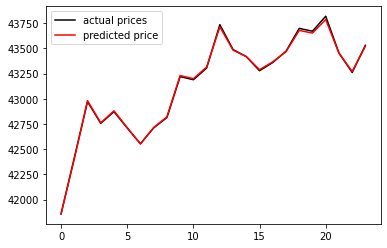

In [ ]:
#data visualisation
plt.plot(df_test['close'].values, color='black', label='actual prices')
plt.plot(predicted_price, color='red', label='predicted price')
#plt.title(f'{crypto} price prediction')
plt.xlabel=('Time')
plt.ylabel=('Price')
plt.legend(loc='upper left')
plt.show()